# DiscreteDP Example: Asset Replacement

# 7.2.2 モデルについて

manufacturerが毎年初めに設備を入れ替えるかどうか選択を行う.

    ・設備の稼働年数をa(1<=a<=n)とし、設備から得られるprofitはp(a)で表す.
    ・新しい設備の導入にはコストcがかかる.
    
ここから、どのようなreplacementのpolicyがprofitを最大化するかを考える.

    ・取りうるアクションはxで表し、keepかreplaceとなる.
    ・状態遷移関数g(a,x)は、keepのときa+1、replaceのとき1
    ・報酬関数f(a,x)は、keepのときp(a)、replaceのときp(0)-c
ここから、aは次のBellman equationを満たす.

$V(a) = \max \left\{ p(a)+\delta V(a+1),p(0)-c+\delta V(1) \right\}$

ただし、n年までに必ずreplaceを行うため、p(n)＝－∞とする.

また、上の等式は以下のことを表す.
    
    ・もし設備をa年まで保有した場合、次年までにp(a)の報酬が発生し、
    　さらに設備の価値がV(a+1)となる.
    ・もしreplaceを行うと、次年までにp(0)-cの報酬が発生し、
    　さらに設備の価値がV(1)になる.
     
ここで、V(a)は単にa年保有している設備が将来にかけて生み出す純利益だけでなく、その後保有されるすべての設備が将来にわたって生み出す純利益を表す.

# 7.6.2 Example

・profitは　$p(a)=50-2.5a-2.5a^2$

In [1]:
using QuantEcon

In [2]:
maxage = 5    # Maximum asset age
repcost = 75  # Replacement cost
beta = 0.9    # Discount factor
m = 2         # Number of actions; 1: keep, 2: replace

2

In [3]:
# State space
S = [i for i in 1:maxage]
# Number of states
n = length(S)

5

In [4]:
# Reward array
R = Array{Float64}(n,m)
for i in 1:n
R[i, 1] = 50 - 2.5 * S[i] - 2.5 * S[i]^2
R[i, 2] = 50 - repcost
end

# Infeasible action
R[n,1] = -Inf

-Inf

In [5]:
R

5×2 Array{Float64,2}:
   45.0  -25.0
   35.0  -25.0
   20.0  -25.0
    0.0  -25.0
 -Inf    -25.0

In [6]:
# (Degenerate) transition probability array
Q = zeros(n,m,n)
for i in 1:n
    Q[i, 1, min(i+1, n)] = 1 #keep
    Q[i, 2, 1] = 1 #replace
end

In [7]:
Q #python版Qを縦に見たかたち

5×2×5 Array{Float64,3}:
[:, :, 1] =
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0
 0.0  1.0

[:, :, 2] =
 1.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

[:, :, 3] =
 0.0  0.0
 1.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

[:, :, 4] =
 0.0  0.0
 0.0  0.0
 1.0  0.0
 0.0  0.0
 0.0  0.0

[:, :, 5] =
 0.0  0.0
 0.0  0.0
 0.0  0.0
 1.0  0.0
 1.0  0.0

In [8]:
# Create a DiscreteDP
ddp = DiscreteDP(R, Q, beta)

QuantEcon.DiscreteDP{Float64,3,2,Float64,Int64}([45.0 -25.0; 35.0 -25.0; … ; 0.0 -25.0; -Inf -25.0], [0.0 1.0; 0.0 1.0; … ; 0.0 1.0; 0.0 1.0]

[1.0 0.0; 0.0 0.0; … ; 0.0 0.0; 0.0 0.0]

[0.0 0.0; 1.0 0.0; … ; 0.0 0.0; 0.0 0.0]

[0.0 0.0; 0.0 0.0; … ; 0.0 0.0; 0.0 0.0]

[0.0 0.0; 0.0 0.0; … ; 1.0 0.0; 1.0 0.0], 0.9, Nullable{Array{Int64,1}}(), Nullable{Array{Int64,1}}())

In [9]:
# Solve the dynamic optimization problem (by policy iteration)
res = solve(ddp)

QuantEcon.DPSolveResult{QuantEcon.VFI,Float64}([216.56, 190.622, 172.913, 169.904, 169.904], [216.56, 190.622, 172.913, 169.904, 169.904], 123, [1, 1, 1, 2, 2], Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
[0.0 1.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 1.0 0.0 … 0.0 0.0; 1.0 0.0 … 0.0 0.0])

In [10]:
# 反復回数
res.num_iter

123

In [11]:
# Optimal value function
res.v

5-element Array{Float64,1}:
 216.56 
 190.622
 172.913
 169.904
 169.904

In [12]:
# Optimal policy
res.sigma - 1

5-element Array{Int64,1}:
 0
 0
 0
 1
 1

In [15]:
# Transition probability matrix
res.mc.p

5×5 Array{Float64,2}:
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0

In [16]:
# Simulate the controlled Markov chain
initial_state_value = 1
nyrs = 12
spath = simulate(res.mc, nyrs+1, init=initial_state_value)

13-element Array{Int64,1}:
 1
 2
 3
 4
 1
 2
 3
 4
 1
 2
 3
 4
 1

In [17]:
using PyPlot

INFO: Recompiling stale cache file C:\Users\mao21\.julia\lib\v0.6\PyPlot.ji for module PyPlot.


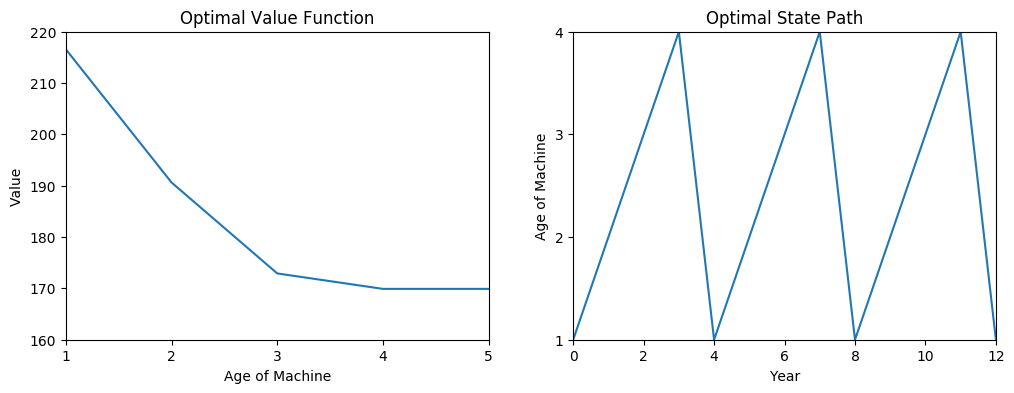

PyObject <matplotlib.text.Text object at 0x0000000041D48208>

In [18]:
import PyPlot.plt
fig, axes = plt[:subplots](1, 2, figsize=(12, 4))
axes[1][:plot]( [i for i in 1:n], res.v)
axes[1][:set_xlim](1, 5)
axes[1][:set_ylim](160, 220)
axes[1][:set_xticks](linspace(1, 5, 5))
axes[1][:set_xlabel]("Age of Machine")
axes[1][:set_ylabel]("Value")
axes[1][:set_title]("Optimal Value Function")

axes[2][:plot](spath)
axes[2][:set_xlim](0, nyrs)
axes[2][:set_ylim](1, 4)
axes[2][:set_yticks](linspace(1, 4, 4))
axes[2][:set_xlabel]("Year")
axes[2][:set_ylabel]("Age of Machine")
axes[2][:set_title]("Optimal State Path")

上のグラフから、設備は4年毎にreplaceするのが最適になっていることがわかる.